<a href="https://colab.research.google.com/github/amiable17/Deep_Learning/blob/master/study1/16_%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%9D%B8%EC%8B%9D%EC%9D%98%EA%BD%83%2CCNN%EC%9D%B5%ED%9E%88%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **모두의 딥러닝**
## 다섯째마당-딥러닝의 활용

### 16장 이미지 인식의 꽃, CNN 익히기

In [0]:
# MNIST 데이터셋 불러오기
from keras.datasets import mnist

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))
# 데이터셋: 미국 국립표준기술원(NIST)이 고등학생과 인구조사국 직원 등이 쓴 손글씨로 만든 데이터로 구성.
# 70,000개의 글자 이미지에 각각 0부터 9까지 이름표를 붙인 데이터셋.

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


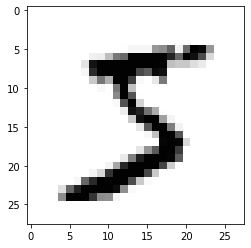

Class : 5


In [0]:
# 불러온 이미지 중 한 개만 불러와서 이미지 출력해보기
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = "Greys")
plt.show()

# 해당 이미지의 label 확인
print("Class : %d" % (Y_class_train[0]))

In [0]:
# 컴퓨터가 인식하는 이미지: 밝기 정도에 따라 0~255까지의 숫자로 픽셀을 인식
import sys
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%d\t' % i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [0]:
print(X_train.shape)
# (60000, 28, 28). 따라서 28 * 28 = 784개의 속성을 이용해서 맞추는 문제
# 784의 1차원 배열로 바꿔 주어야 함.
X_train = X_train.reshape(X_train.shape[0], 784)

(60000, 28, 28)


In [0]:
# scale 변환을 해 줘야 함
X_train = X_train.astype('float64')
X_train = X_train / 255

In [0]:
# test set에도 똑같이 적용
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [0]:
# class data에 one-hot encoding 적용하기
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# 딥러닝 기본 프레임 만들기
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

# 모델 저장 및 earlystopping 조건 설정하기
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

Model_dir = './model/'
if not os.path.exists(Model_dir):
  os.mkdir(Model_dir)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', verbose = 1, patience = 10)

history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size = 200, verbose = 0, callbacks = [checkpointer, early_stopping_callback])

# test 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where









Epoch 00001: val_loss improved from inf to 0.15762, saving model to ./model/01-0.1576.hdf5

Epoch 00002: val_loss improved from 0.15762 to 0.11417, saving model to ./model/02-0.1142.hdf5

Epoch 00003: val_loss improved from 0.11417 to 0.08552, saving model to ./model/03-0.0855.hdf5

Epoch 00004: val_loss improved from 0.08552 to 0.07282, saving model to ./model/04-0.0728.hdf5

Epoch 00005: val_loss improved from 0.07282 to 0.06818, saving model to ./model/05-0.0682.hdf5

Epoch 00006: val_loss improved from 0.06818 to 0.06566, saving model to ./model/06-0.0657.hdf5

Epoch 00007: val_loss improved from 0.06566 to 0.06257, saving model to ./model/07-0.0626.hdf5

Epoch 00008: val_loss did not improve from 0.06257

Epoch 00009: val_loss improved from 0.06257 to 0.05858, saving model to ./model/09-0.0586.hdf5

Epoch 00010: val_loss did not improve from 0.05858

Epoch 00011: val_loss di

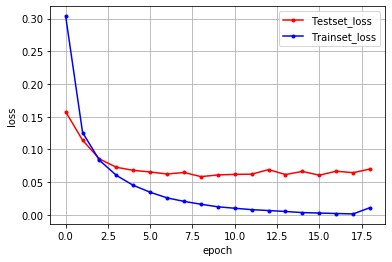

In [0]:
# 실행 결과 그래프로 표현하기
import matplotlib.pyplot as plt
import numpy as np

# 테스트셋 오차
y_vloss = history.history['val_loss']

# 학습셋 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 컨볼루션 신경망(Convolutional Neural Network, CNN)
* 입력된 이미지에서 다시 한번 특징을 추출하기 위해 마스크(= 필터, 윈도, 커널)를 도입하는 기법
* 여러개의 마스크를 만들 경우 여러 개의 컨볼루션(합성곱)이 만들어짐.
> 컨볼루션 층 추가 함수: Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu')
>> * units: 마스크를 몇 개 적용할지 정함
>> * kerner_size: 마스크 크기 결정. (행, 열)
>> * input_shape: 입력되는 값의 크기. (행, 열, 색상=3/흑백=1)
>> * activation: 활성화 함수

#### 맥스 풀링
* 크고 복잡한 결과를 축소: 풀링(pooling), 서브 샘플링(sub sampling)
* 맥스 풀링: 정해진 구역 안에서 가장 큰 값만 다음 층으로 넘기고 나머지는 버림.
> MaxPooling2D(pool_size=2)
>> * pool_size = 2: 풀링 창의 크기 결정. 2로 정하면 전체 크기가 절반으로 줄어듦.

#### 드롭아웃(dropout): 은닉층에 배치된 노드 중 일부를 임의로 꺼줌으로써 학습 데이터에 지나치게 치우쳐 학습되는 과적합 방지.

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')/255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Epoch 00001: val_loss improved from inf to 0.05987, saving model to ./model/01-0.0599.hdf4

Epoch 00002: val_loss improved from 0.05987 to 0.04264, saving model to ./model/02-0.0426.hdf4

Epoch 00003: val_loss improved from 0.04264 to 0.03782, saving model to ./model/03-0.0378.hdf4

Epoch 00004: val_loss improved from 0.03782 to 0.03213, saving model to ./model/04-0.0321.hdf4

Epoch 00005: val_loss improved from 0.03213 to 0.02811, saving model to ./model/05-0.0281.hdf4

Epoch 00006: val_loss did not improve from 0.02811

Epoch 00007: val_loss did not improve from 0.02811

Epoch 00008: val_loss did not improve from 0.02811

Epoch 00009: val_loss improved from 0.02811 to 0.02804, saving model to ./model/09-0.0280.hdf4

Epoch 00010: val_loss did not improve from 0.02804

Epoch 00011: val_loss improved from 0.02804 to 0.02648, saving model to ./model/11-0.0265.hdf4

Epoch 

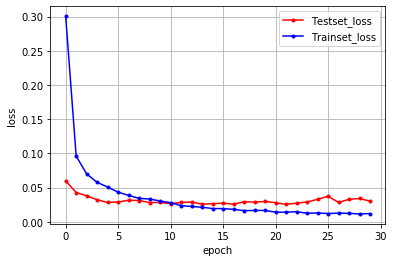

In [0]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (X_train.shape[1],X_train.shape[2],1), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['acc'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=10)

# 모델 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 30, batch_size=200, verbose=0, callbacks=[checkpointer, early_stopping_callback])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트셋 오차
y_vloss = history.history['val_loss']
# 학습셋 오차
y_loss = history.history['loss']

# 그래프로 표현하기
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()